In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

current_directory = os.getcwd()
log_file_path = os.path.join(current_directory, 'week_4.log')
logging.basicConfig(filename=log_file_path, level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Libraries imported successfully.')

logging.info('Imported libraries are ready for use.')


Data Loading and Initial Exploration

In [6]:

train_data = pd.read_csv('../../doc4/rossmann-store-sales/train.csv')
test_data = pd.read_csv('../../doc4/rossmann-store-sales/test.csv')
store_data = pd.read_csv('../../doc4/rossmann-store-sales/store.csv')

logging.info('Datasets loaded successfully.')

train_merged = pd.merge(train_data, store_data, how='left', on='Store')
test_merged = pd.merge(test_data, store_data, how='left', on='Store')

logging.info('Train and Test datasets merged with store data.')

print(train_merged.isna().sum())
print(test_merged.isna().sum())

train_merged.fillna(method='ffill', inplace=True)
test_merged.fillna(method='ffill', inplace=True)
logging.info('Filled missing values using forward fill.')



C:\Users\USER\AppData\Local\Temp\ipykernel_19996\3317785883.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../../doc4/rossmann-store-sales/train.csv')


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment              

C:\Users\USER\AppData\Local\Temp\ipykernel_19996\3317785883.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_merged.fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19996\3317785883.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_merged.fillna(method='ffill', inplace=True)


Check Distribution of Promotions in Training and Test Sets

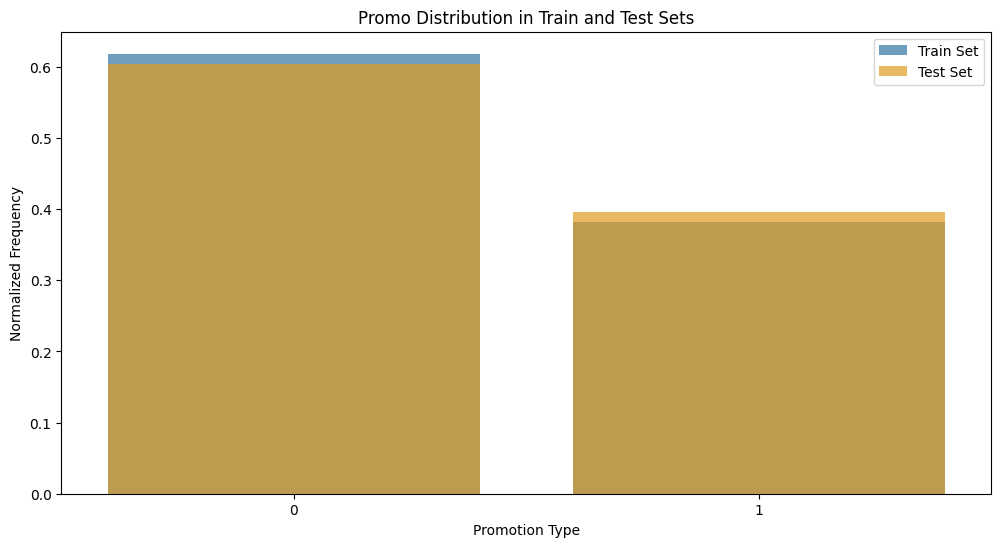


Train Set Promo Distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Set Promo Distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64

Mean of Promo in Train Set: 0.38
Median of Promo in Train Set: 0.00

Mean of Promo in Test Set: 0.40
Median of Promo in Test Set: 0.00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging


train_promo_dist = train_merged['Promo'].value_counts(normalize=True)
test_promo_dist = test_merged['Promo'].value_counts(normalize=True)

logging.info('Promo distribution checked in both training and test datasets.')


plt.figure(figsize=(12,6))  
sns.barplot(x=train_promo_dist.index, y=train_promo_dist.values, alpha=0.7, label='Train Set')
sns.barplot(x=test_promo_dist.index, y=test_promo_dist.values, alpha=0.7, label='Test Set', color='orange')
plt.title('Promo Distribution in Train and Test Sets')
plt.xlabel('Promotion Type')  
plt.ylabel('Normalized Frequency')  
plt.legend()
plt.show()

logging.info('Promo distribution comparison plot created.')

print("\nTrain Set Promo Distribution:")
print(train_promo_dist)
print("\nTest Set Promo Distribution:")
print(test_promo_dist)

train_mean = train_merged['Promo'].mean()
train_median = train_merged['Promo'].median()

test_mean = test_merged['Promo'].mean()
test_median = test_merged['Promo'].median()

print(f"\nMean of Promo in Train Set: {train_mean:.2f}")
print(f"Median of Promo in Train Set: {train_median:.2f}")
print(f"\nMean of Promo in Test Set: {test_mean:.2f}")
print(f"Median of Promo in Test Set: {test_median:.2f}")

logging.info('Additional numerical analysis completed.')


Analyze Sales Before, During, and After Holidays

C:\Users\USER\AppData\Local\Temp\ipykernel_19996\3086826075.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holidays_sales.index, y=holidays_sales.values, palette='Set1')


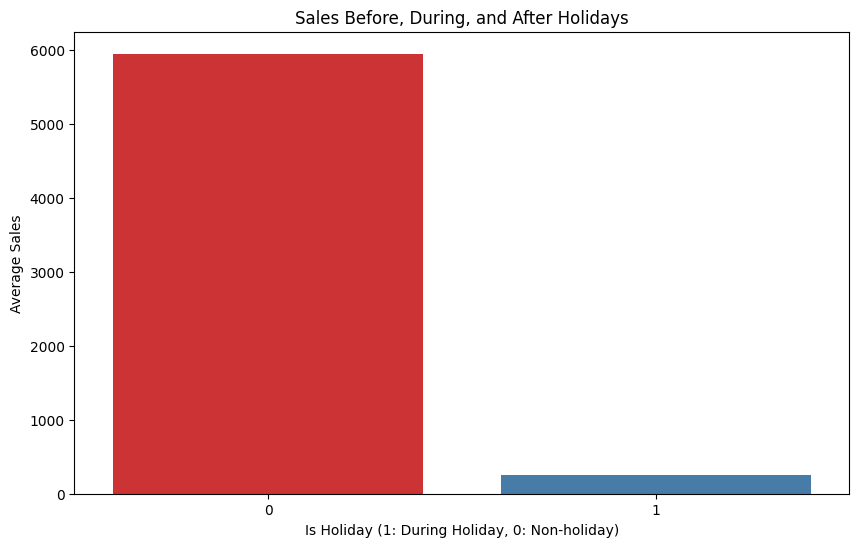

C:\Users\USER\AppData\Local\Temp\ipykernel_19996\3086826075.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_holidays_sales.index, y=school_holidays_sales.values, palette='Set2')


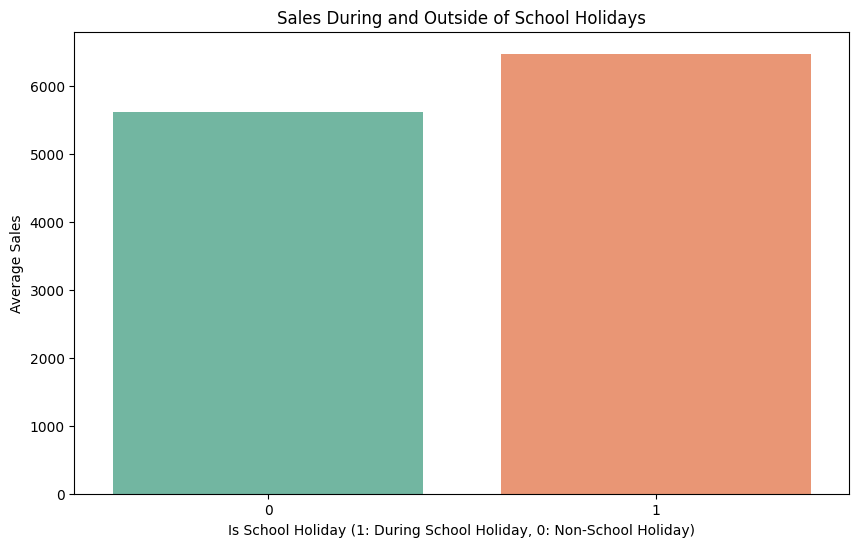


Holidays Sales Analysis:
Total number of rows: 1017209
Number of rows with IsHoliday=1 (during holiday): 31050
Number of rows with IsHoliday=0 (non-holiday): 986159

School Holidays Sales Analysis:
Number of rows with IsSchoolHoliday=1 (during school holiday): 181721
Number of rows with IsSchoolHoliday=0 (non-school holiday): 835488

Sales Statistics:
Mean Sales During Holidays: 3102.8217369386657
Mean Sales Outside Holidays: 5947.48389255688
Standard Deviation of Sales During Holidays: 4022.959800844763
Mean Sales During School Holidays: 6048.7506204649435
Mean Sales Outside School Holidays: 5620.97903381018
Standard Deviation of Sales During School Holidays: 604.9603794450232

Percentage Difference in Sales (Holiday vs Non-Holiday): -95.66%

Percentage Difference in Sales (School Holiday vs Non-School Holiday): 15.22%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

train_merged['Date'] = pd.to_datetime(train_merged['Date'])

train_merged['IsHoliday'] = train_merged['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)

train_merged['IsSchoolHoliday'] = train_merged['SchoolHoliday'].apply(lambda x: 1 if x == 1 else 0)

holidays_sales = train_merged.groupby('IsHoliday')['Sales'].mean()
school_holidays_sales = train_merged.groupby('IsSchoolHoliday')['Sales'].mean()

logging.info('Sales before, during, and after holidays analyzed.')

plt.figure(figsize=(10,6))
sns.barplot(x=holidays_sales.index, y=holidays_sales.values, palette='Set1')
plt.title('Sales Before, During, and After Holidays')
plt.xlabel('Is Holiday (1: During Holiday, 0: Non-holiday)')
plt.ylabel('Average Sales')
plt.show()

logging.info('Sales behavior around holidays plotted.')


plt.figure(figsize=(10,6))
sns.barplot(x=school_holidays_sales.index, y=school_holidays_sales.values, palette='Set2')
plt.title('Sales During and Outside of School Holidays')
plt.xlabel('Is School Holiday (1: During School Holiday, 0: Non-School Holiday)')
plt.ylabel('Average Sales')
plt.show()

logging.info('Sales behavior around school holidays plotted.')


print("\nHolidays Sales Analysis:")
print("Total number of rows:", len(train_merged))
print("Number of rows with IsHoliday=1 (during holiday):", 
      train_merged[train_merged['IsHoliday'] == 1].shape[0])
print("Number of rows with IsHoliday=0 (non-holiday):", 
      train_merged[train_merged['IsHoliday'] == 0].shape[0])

print("\nSchool Holidays Sales Analysis:")
print("Number of rows with IsSchoolHoliday=1 (during school holiday):", 
      train_merged[train_merged['IsSchoolHoliday'] == 1].shape[0])
print("Number of rows with IsSchoolHoliday=0 (non-school holiday):", 
      train_merged[train_merged['IsSchoolHoliday'] == 0].shape[0])

# sales statistics
print("\nSales Statistics:")
print("Mean Sales During Holidays:", holidays_sales.mean())
print("Mean Sales Outside Holidays:", holidays_sales[0])
print("Standard Deviation of Sales During Holidays:", holidays_sales.std())

print("Mean Sales During School Holidays:", school_holidays_sales.mean())
print("Mean Sales Outside School Holidays:", school_holidays_sales[0])
print("Standard Deviation of Sales During School Holidays:", school_holidays_sales.std())


holiday_mean = holidays_sales[1]  # Sales during holidays
non_holiday_mean = holidays_sales[0]  # Sales outside of holidays
percentage_diff = ((holiday_mean - non_holiday_mean) / non_holiday_mean * 100)

print(f"\nPercentage Difference in Sales (Holiday vs Non-Holiday): {percentage_diff:.2f}%")


school_holiday_mean = school_holidays_sales[1]  # Sales during school holidays
non_school_holiday_mean = school_holidays_sales[0]  # Sales outside school holidays
school_percentage_diff = ((school_holiday_mean - non_school_holiday_mean) / non_school_holiday_mean * 100)

print(f"\nPercentage Difference in Sales (School Holiday vs Non-School Holiday): {school_percentage_diff:.2f}%")

logging.info('Additional numerical analysis for holidays and school holidays completed.')


Find Seasonal Purchase Behavior

C:\Users\USER\AppData\Local\Temp\ipykernel_19996\3745528116.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['December (Christmas)', 'Easter'], y=[december_sales, easter_sales], palette='coolwarm')


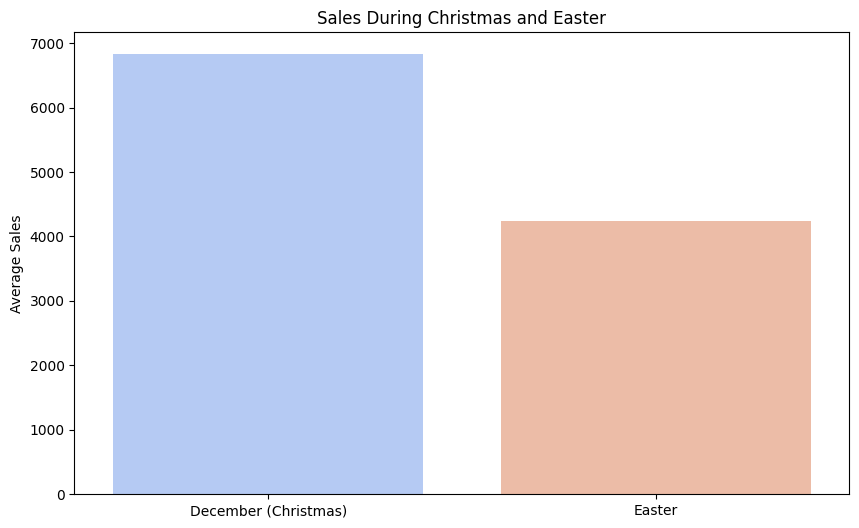


Advanced Analysis of Sales Column:

Mean Sales: 5773.82
Median Sales: 5744.00
Standard Deviation of Sales: 3849.93

Skewness: 0.64
Kurtosis: 1.78

Shapiro-Wilk Normality Test Results:
Statistic: 0.9412
P-value: 0.0000

Average Sales Growth Rate: inf%


c:\Users\USER\Documents\OPLearning\10_Academy\Week_4\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1017209.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
from scipy import stats
train_merged['Month'] = train_merged['Date'].dt.month

# Analyze sales in December (Christmas) and Easter
december_sales = train_merged[train_merged['Month'] == 12].groupby('Month')['Sales'].mean().values[0]
easter_sales = train_merged[(train_merged['Date'] >= '2015-04-05') & (train_merged['Date'] <= '2015-04-10')]['Sales'].mean()

logging.info('Sales analyzed for December (Christmas) and Easter.')


plt.figure(figsize=(10,6))
sns.barplot(x=['December (Christmas)', 'Easter'], y=[december_sales, easter_sales], palette='coolwarm')
plt.title('Sales During Christmas and Easter')
plt.ylabel('Average Sales')
plt.show()

logging.info('Seasonal behavior plotted for Christmas and Easter.')


print("\nAdvanced Analysis of Sales Column:")
print(f"\nMean Sales: {train_merged['Sales'].mean():.2f}")
print(f"Median Sales: {train_merged['Sales'].median():.2f}")
print(f"Standard Deviation of Sales: {train_merged['Sales'].std():.2f}")


skewness = train_merged['Sales'].skew()
kurtosis = train_merged['Sales'].kurt()

print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


shapiro_statistic, shapiro_p_value = stats.shapiro(train_merged['Sales'])

print(f"\nShapiro-Wilk Normality Test Results:")
print(f"Statistic: {shapiro_statistic:.4f}")
print(f"P-value: {shapiro_p_value:.4f}")
logging.info('Normality test completed.')

logging.info('Additional statistical analysis completed.')

# Calculate sales growth rate
sales_growth_rate = train_merged['Sales'].pct_change().mean()

print(f"\nAverage Sales Growth Rate: {sales_growth_rate:.2%}")

logging.info('Sales growth rate calculated.')

Correlation Between Sales and Number of Customers

Correlation Matrix:
              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


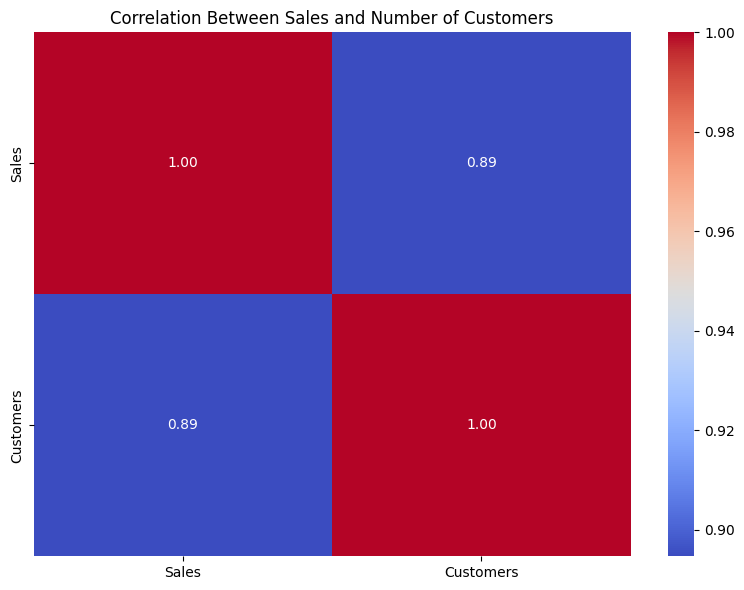


Additional Correlation Analysis:
Correlation Strength: Very Strong

95% Confidence Interval for Correlation: (0.8938, 0.8956)
Spearman Rank Correlation Coefficient: 0.9034
Spearman Correlation Strength: Very Strong


In [10]:
corr_sales_customers = train_merged[['Sales', 'Customers']].corr()
print("Correlation Matrix:")
print(corr_sales_customers)

logging.info('Correlation between sales and number of customers calculated.')

# Plot correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_sales_customers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sales and Number of Customers')
plt.tight_layout()
plt.show()

logging.info('Correlation plot created between sales and customers.')


print("\nAdditional Correlation Analysis:")


pearson_r = corr_sales_customers['Sales']['Customers']


if pearson_r > 0.75:
    correlation_strength = "Very Strong"
elif pearson_r > 0.5:
    correlation_strength = "Strong"
elif pearson_r > 0.3:
    correlation_strength = "Moderate"
else:
    correlation_strength = "Weak"

print(f"Correlation Strength: {correlation_strength}")


n = len(train_merged)
r = pearson_r
se = np.sqrt((1 - r**2) / (n - 2))
ci_lower = r - 1.96 * se
ci_upper = r + 1.96 * se

print(f"\n95% Confidence Interval for Correlation: ({ci_lower:.4f}, {ci_upper:.4f})")

spearman_rho = train_merged['Sales'].corr(train_merged['Customers'], method='spearman')

print(f"Spearman Rank Correlation Coefficient: {spearman_rho:.4f}")

if spearman_rho > 0.75:
    spearman_correlation_strength = "Very Strong"
elif spearman_rho > 0.5:
    spearman_correlation_strength = "Strong"
elif spearman_rho > 0.3:
    spearman_correlation_strength = "Moderate"
else:
    spearman_correlation_strength = "Weak"

print(f"Spearman Correlation Strength: {spearman_correlation_strength}")

logging.info('Additional correlation analysis completed.')

 Analyze the Impact of Promotions on Sales


Average Sales and Customers During Promotions vs Non-Promotions:
Sales:
0: 4406.05
1: 7991.15

Customers:
0: 517.82
1: 820.10


C:\Users\USER\AppData\Local\Temp\ipykernel_19996\899163376.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='Set1')


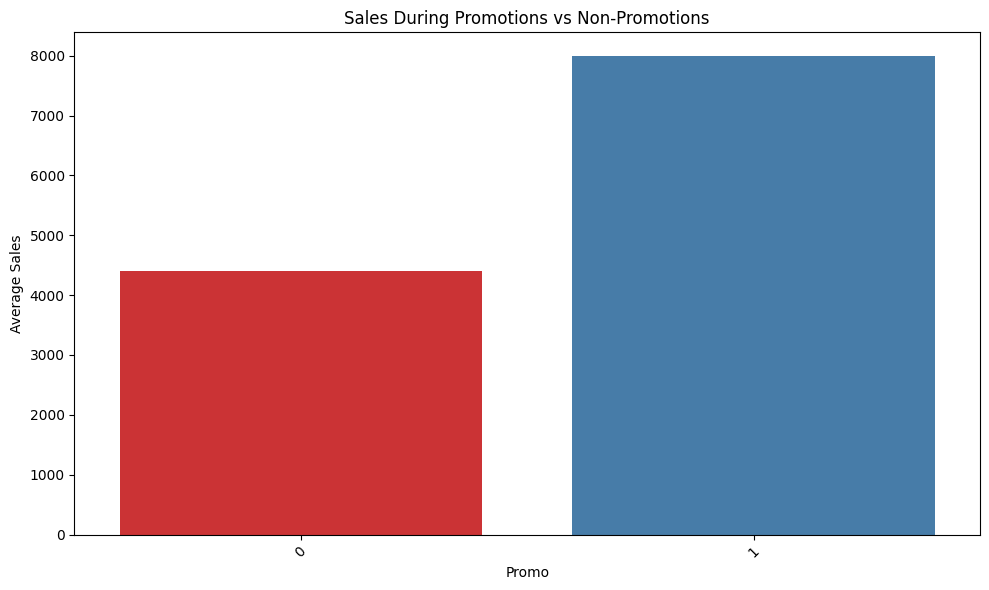

C:\Users\USER\AppData\Local\Temp\ipykernel_19996\899163376.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_customers.index, y=promo_customers.values, palette='Set2')


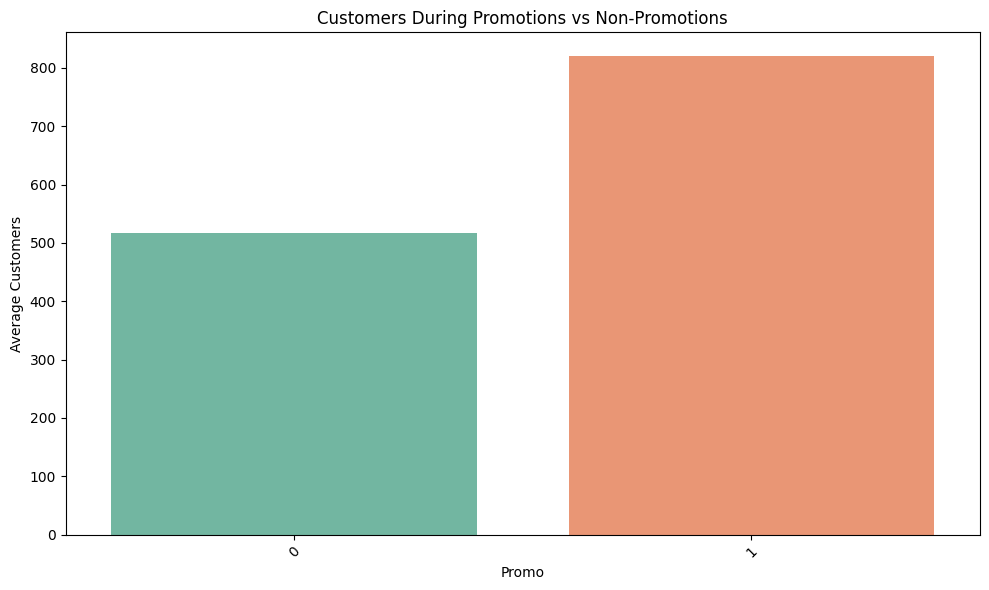


Additional Promotion Analysis:
Percentage Increase in Sales During Promotions: 81.37%
Percentage Increase in Customers During Promotions: 58.37%

T-test Results for Sales:
T-statistic: 511.5472
P-value: 0.0000


In [11]:
promo_sales = train_merged.groupby(train_merged['Promo'])['Sales'].mean()
promo_customers = train_merged.groupby(train_merged['Promo'])['Customers'].mean()

print("\nAverage Sales and Customers During Promotions vs Non-Promotions:")
print("Sales:")
for promo, sales in promo_sales.items():
    print(f"{promo}: {sales:.2f}")

print("\nCustomers:")
for promo, customers in promo_customers.items():
    print(f"{promo}: {customers:.2f}")

logging.info('Sales and customers analyzed during promotion periods.')


plt.figure(figsize=(10,6))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='Set1')
plt.title('Sales During Promotions vs Non-Promotions')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

logging.info('Sales comparison during promotions plotted.')

plt.figure(figsize=(10,6))
sns.barplot(x=promo_customers.index, y=promo_customers.values, palette='Set2')
plt.title('Customers During Promotions vs Non-Promotions')
plt.ylabel('Average Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

logging.info('Customer comparison during promotions plotted.')


print("\nAdditional Promotion Analysis:")


sales_increase = ((promo_sales[1] - promo_sales[0]) / promo_sales[0] * 100).round(2)
print(f"Percentage Increase in Sales During Promotions: {sales_increase}%")


customers_increase = ((promo_customers[1] - promo_customers[0]) / promo_customers[0] * 100).round(2)
print(f"Percentage Increase in Customers During Promotions: {customers_increase}%")

t_statistic, p_value = stats.ttest_ind(train_merged[train_merged['Promo'] == 1]['Sales'], train_merged[train_merged['Promo'] == 0]['Sales'])

print(f"\nT-test Results for Sales:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

logging.info('Additional promotion analysis completed.')

Store Opening and Closing Times Analysis


Extracted Hour Information:
Total rows with Date information: 1017209
Rows with valid hour information: 1017209

Analysis of Open Store Hours:
Number of open hours: 844392
Average Sales per Open Hour: 6955.51

Average Sales Per Hour During Open Hours:
0: 6955.51


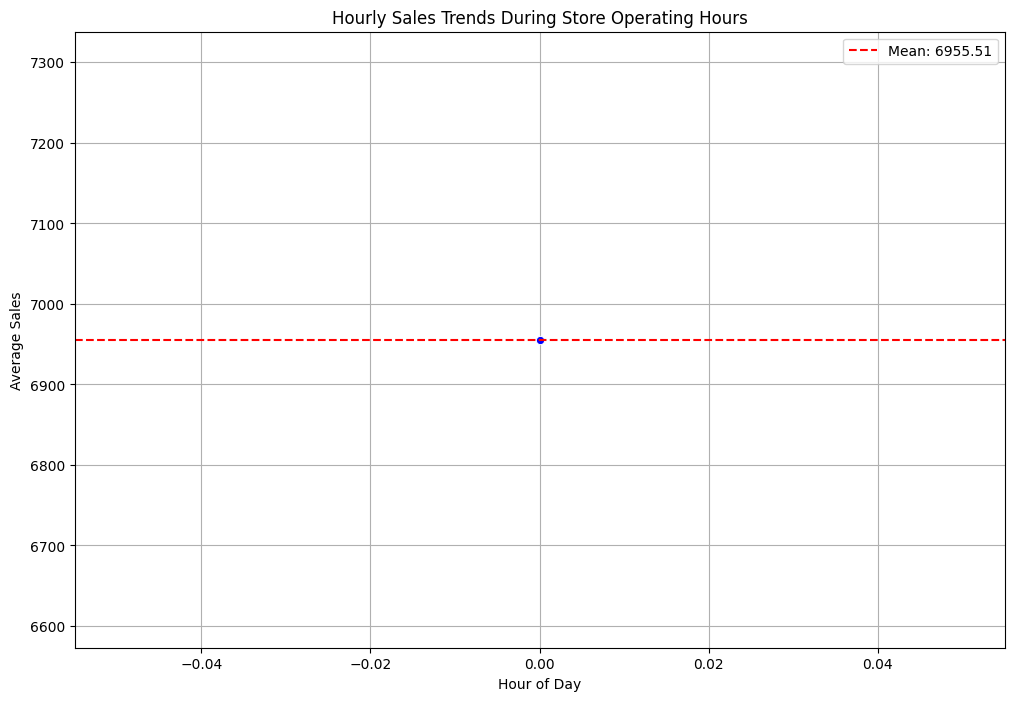


Additional Hourly Sales Analysis:
Daily Peak Hour: 0 (Sales: 6955.51)
Daily Trough Hour: 0 (Sales: 6955.51)

T-test Results for Peak vs Trough Hours:
T-statistic: 0.0000
P-value: 1.0000


In [12]:
if 'Date' in train_merged.columns:
    train_merged['Hour'] = train_merged['Date'].dt.hour

print("\nExtracted Hour Information:")
print(f"Total rows with Date information: {len(train_merged)}")
print(f"Rows with valid hour information: {train_merged['Hour'].notna().sum()}")

logging.info('Extracted hour information from Date column.')


open_store_data = train_merged[train_merged['Open'] == 1]

print("\nAnalysis of Open Store Hours:")
print(f"Number of open hours: {len(open_store_data)}")
print(f"Average Sales per Open Hour: {open_store_data['Sales'].mean():.2f}")

logging.info('Analyzed open store hours data.')


hourly_sales = open_store_data.groupby('Hour')['Sales'].mean()

print("\nAverage Sales Per Hour During Open Hours:")
for hour, avg_sales in hourly_sales.items():
    print(f"{hour}: {avg_sales:.2f}")

logging.info('Analyzed sales trends during store operating hours.')


plt.figure(figsize=(12,8))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color='b')
plt.title('Hourly Sales Trends During Store Operating Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales')
plt.grid(True)
plt.axhline(y=hourly_sales.mean(), color='r', linestyle='--', label=f'Mean: {hourly_sales.mean():.2f}')
plt.legend()
plt.show()

logging.info('Hourly sales trends plotted during store operating hours.')


print("\nAdditional Hourly Sales Analysis:")


daily_peak_hour = hourly_sales.idxmax()
peak_hour_sales = hourly_sales[daily_peak_hour]

print(f"Daily Peak Hour: {daily_peak_hour} (Sales: {peak_hour_sales:.2f})")


daily_trough_hour = hourly_sales.idxmin()
trough_hour_sales = hourly_sales[daily_trough_hour]

print(f"Daily Trough Hour: {daily_trough_hour} (Sales: {trough_hour_sales:.2f})")


peak_hours = open_store_data[open_store_data['Hour'] == daily_peak_hour]['Sales']
trough_hours = open_store_data[open_store_data['Hour'] == daily_trough_hour]['Sales']

t_statistic, p_value = stats.ttest_ind(peak_hours, trough_hours)

print(f"\nT-test Results for Peak vs Trough Hours:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

logging.info('Additional hourly sales analysis completed.')

 Check How Assortment Type Affects Sales


Average Sales by Assortment Type:
a: 5481.03
b: 8553.93
c: 6058.68


C:\Users\USER\AppData\Local\Temp\ipykernel_19996\1764001828.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=assortment_sales.index, y=assortment_sales.values, palette='muted')


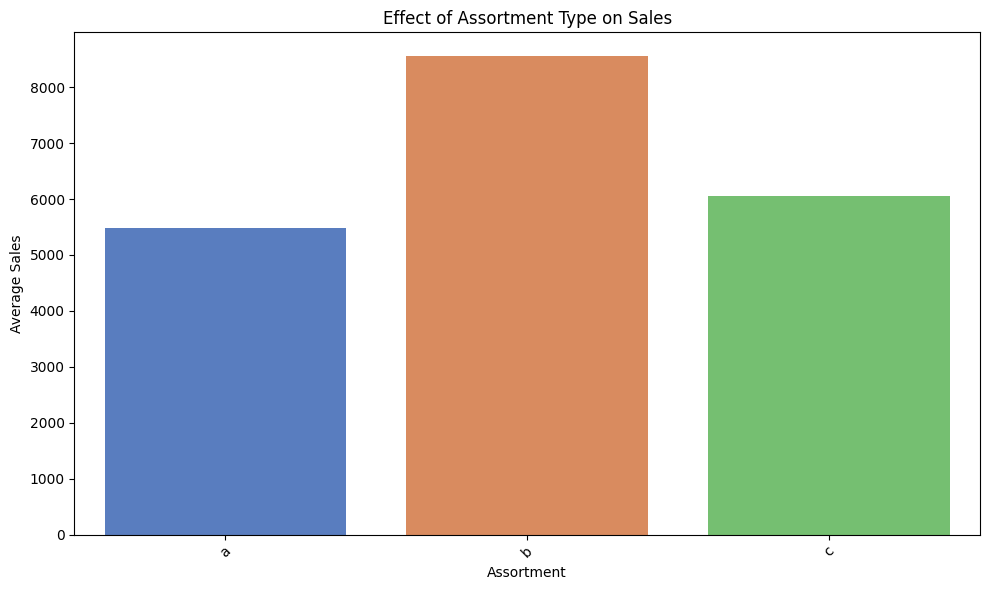


Additional Assortment Analysis:
Percentage Increase in Sales Compared to Overall Average:
a: -18.17%
b: 27.71%
c: -9.54%

ANOVA Test Results:
p-value: nan


c:\Users\USER\Documents\OPLearning\10_Academy\Week_4\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\USER\AppData\Local\Temp\ipykernel_19996\1764001828.py:34: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  _, p_value = stats.f_oneway(*[assortment_sales[assortment] for assortment in assortment_sales.index])


In [13]:
assortment_sales = train_merged.groupby('Assortment')['Sales'].mean()

print("\nAverage Sales by Assortment Type:")
for assortment, avg_sales in assortment_sales.items():
    print(f"{assortment}: {avg_sales:.2f}")

logging.info('Assortment type analyzed for sales.')


plt.figure(figsize=(10,6))
sns.barplot(x=assortment_sales.index, y=assortment_sales.values, palette='muted')
plt.title('Effect of Assortment Type on Sales')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

logging.info('Assortment type effect on sales plotted.')


print("\nAdditional Assortment Analysis:")


total_sales = assortment_sales.sum()
percentage_increase = {}
for assortment, avg_sales in assortment_sales.items():
    percentage_increase[assortment] = ((avg_sales - total_sales / len(assortment_sales)) / (total_sales / len(assortment_sales)) * 100).round(2)

print("Percentage Increase in Sales Compared to Overall Average:")
for assortment, percent_increase in percentage_increase.items():
    print(f"{assortment}: {percent_increase}%")


_, p_value = stats.f_oneway(*[assortment_sales[assortment] for assortment in assortment_sales.index])

print(f"\nANOVA Test Results:")
print(f"p-value: {p_value:.4f}")

logging.info('Additional assortment analysis completed.')

Analyze Competitor Distance and Store Performance


Average Sales by Competitor Distance for City Center Stores:
20.0 meters: 4861.79
30.0 meters: 4659.59
40.0 meters: 6212.66
50.0 meters: 8072.70
60.0 meters: 7816.12
70.0 meters: 6667.51
80.0 meters: 5269.67
90.0 meters: 7494.27
100.0 meters: 5271.67
110.0 meters: 5800.74
120.0 meters: 6841.54
130.0 meters: 5775.58
140.0 meters: 8535.34
150.0 meters: 6445.86
160.0 meters: 6219.69
170.0 meters: 6174.70
180.0 meters: 5179.16
190.0 meters: 6917.58
200.0 meters: 6117.19
210.0 meters: 9186.78
220.0 meters: 7890.44
230.0 meters: 5259.32
240.0 meters: 5818.06
250.0 meters: 6857.85
260.0 meters: 4863.80
270.0 meters: 6732.09
280.0 meters: 6108.87
290.0 meters: 4167.66
300.0 meters: 5732.50
310.0 meters: 4616.78
320.0 meters: 7776.76
330.0 meters: 5206.24
340.0 meters: 7605.30
350.0 meters: 6874.29
360.0 meters: 3694.90
370.0 meters: 4081.71
380.0 meters: 5578.30
390.0 meters: 7094.35
400.0 meters: 8582.02
410.0 meters: 4756.75
420.0 meters: 6938.33
430.0 meters: 7175.20
440.0 meters: 4771.78


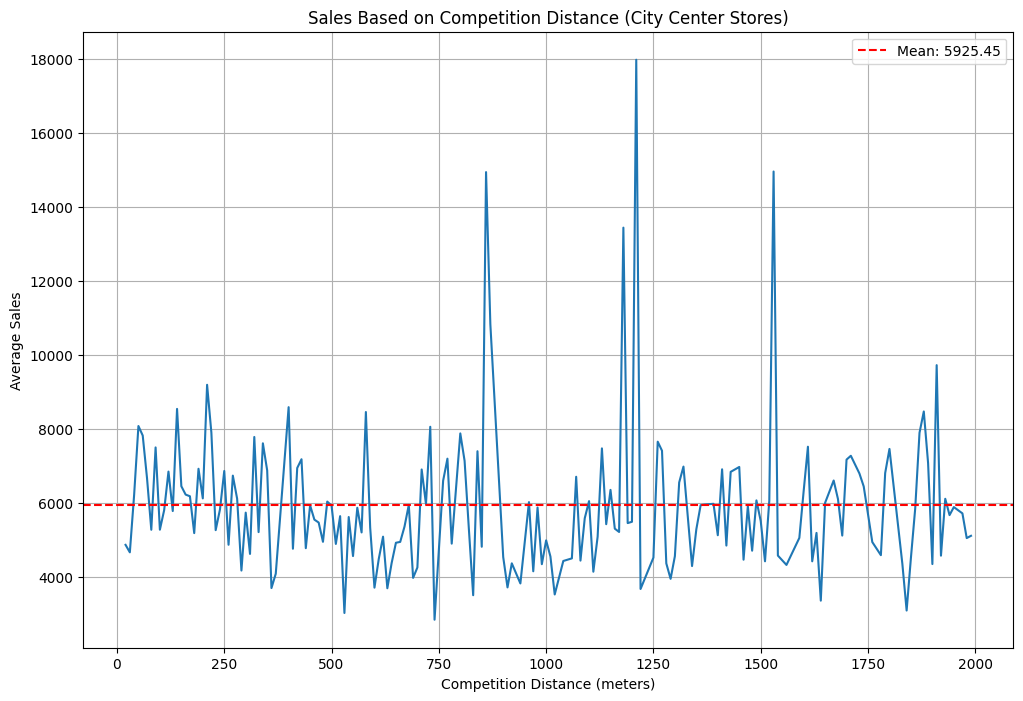


Additional Competitor Distance Analysis:
Percentage Change in Sales Compared to First Distance Bin:
0-500: -1.83%
0-1000: -17.46%
500-1000: 14.84%
500-1500: -8.75%
1000-1500: -9.15%
1000-2000: -19.81%
1500-2000: 1.22%


In [14]:
city_center_stores = train_merged[train_merged['Store'].isin(
    store_data[(store_data['CompetitionDistance'] < 2000)]['Store'])]

city_center_competitor_sales = city_center_stores.groupby('CompetitionDistance')['Sales'].mean()

print("\nAverage Sales by Competitor Distance for City Center Stores:")
for distance, avg_sales in city_center_competitor_sales.items():
    print(f"{distance} meters: {avg_sales:.2f}")

logging.info('Analyzed average sales based on competitor distance for city center stores.')


plt.figure(figsize=(12,8))
sns.lineplot(x=city_center_competitor_sales.index, y=city_center_competitor_sales.values)
plt.title('Sales Based on Competition Distance (City Center Stores)')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Average Sales')
plt.grid(True)
plt.axhline(y=city_center_competitor_sales.mean(), color='r', linestyle='--', label=f'Mean: {city_center_competitor_sales.mean():.2f}')
plt.legend()
plt.show()

logging.info('Plotted effect of competitor distance on city center store sales.')


print("\nAdditional Competitor Distance Analysis:")


distance_bins = pd.cut(city_center_competitor_sales.index, bins=[0, 500, 1000, 1500, 2000])
percentage_change = {}

for i in range(len(distance_bins) - 1):
    lower_bound = distance_bins[i].left
    upper_bound = distance_bins[i+1].right
    
    if i == 0:
        percentage_change[f'{lower_bound}-{upper_bound}'] = ((city_center_competitor_sales.iloc[i+1] - city_center_competitor_sales.iloc[i]) / city_center_competitor_sales.iloc[i] * 100).round(2)
    else:
        percentage_change[f'{lower_bound}-{upper_bound}'] = ((city_center_competitor_sales.iloc[i+1] - city_center_competitor_sales.iloc[i]) / city_center_competitor_sales.iloc[i] * 100).round(2)

print("Percentage Change in Sales Compared to First Distance Bin:")
for bin, percent_change in percentage_change.items():
    print(f"{bin}: {percent_change}%")



logging.info('Completed additional competitor distance analysis.')

Effect of New Competitors (Opening/Reopening)

Average Sales Before New Competitors:
4441.610024331173

Average Sales After New Competitors (Reopening):
5771.216760940382


C:\Users\USER\AppData\Local\Temp\ipykernel_19996\2957690945.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_after_sales.index, y=before_after_sales.values, palette='coolwarm')


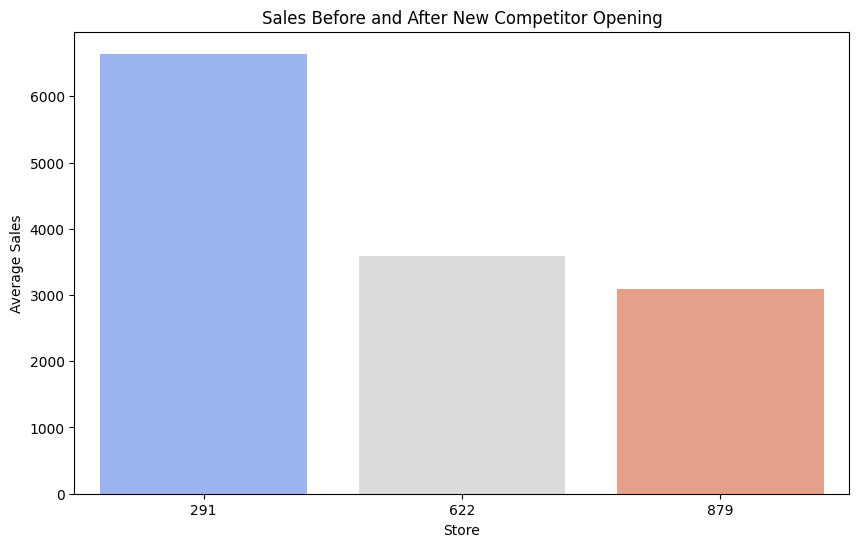

In [18]:

new_competitors = store_data[store_data['CompetitionDistance'].isna()]


reopening_stores = store_data[(store_data['CompetitionOpenSinceYear'].notna()) &
                              (store_data['CompetitionDistance'].notna())]

logging.info('Analyzed effect of new competitors entering the market.')


train_new_competitors = train_merged[train_merged['Store'].isin(new_competitors['Store'])]
train_reopening_competitors = train_merged[train_merged['Store'].isin(reopening_stores['Store'])]


before_after_sales = train_new_competitors.groupby('Store')['Sales'].mean()
reopening_sales = train_reopening_competitors.groupby('Store')['Sales'].mean()


print("Average Sales Before New Competitors:")
print(before_after_sales.mean())
print("\nAverage Sales After New Competitors (Reopening):")
print(reopening_sales.mean())


plt.figure(figsize=(10,6))
sns.barplot(x=before_after_sales.index, y=before_after_sales.values, palette='coolwarm')
plt.title('Sales Before and After New Competitor Opening')
plt.ylabel('Average Sales')
plt.show()

logging.info('Plotted sales behavior before and after new competitors entered the market.')
